<a href="https://colab.research.google.com/github/jeraldflowers/Classifier-Dog_Cats-keras/blob/main/dogs_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers 

In [ ]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [5]:
ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
%cd '/gdrive/My Drive'

/gdrive/My Drive


In [13]:
%cd '/gdrive/My Drive/dataset-cats-dogs/cats_and_dogs'

/gdrive/My Drive/dataset-cats-dogs/cats_and_dogs


In [14]:
!ls

test  train  validation


In [15]:
train_generator = train_datagen.flow_from_directory('/gdrive/My Drive/dataset-cats-dogs/cats_and_dogs/train',
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary'
                                   )

validation_generator = test_datagen.flow_from_directory('/gdrive/My Drive/dataset-cats-dogs/cats_and_dogs/validation',
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary'
                                   )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
checkpoint = ModelCheckpoint('model_dogs_cats.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                 epochs=100,
                 validation_data=validation_generator,
                 validation_steps=1000//32,
                 callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.7938 - accuracy: 0.5777
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model_dogs_cats.hdf5
62/62 [==============================] - 51s 835ms/step - loss: 0.7938 - accuracy: 0.5777 - val_loss: 1.5472 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.7792 - accuracy: 0.5915
Epoch 2: val_accuracy did not improve from 0.50000
62/62 [==============================] - 22s 356ms/step - loss: 0.7792 - accuracy: 0.5915 - val_loss: 1.1937 - val_accuracy: 0.4990
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.7111 - accuracy: 0.6169
Epoch 3: val_accuracy improved from 0.50000 to 0.52621, saving model to model_dogs_cats.hdf5
62/62 [==============================] - 23s 378ms/step - loss: 0.7111 - accuracy: 0.6169 - val_loss: 1.0567 - val_accuracy: 0.5262
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6442 - accurac

In [20]:
import matplotlib.pyplot as plt

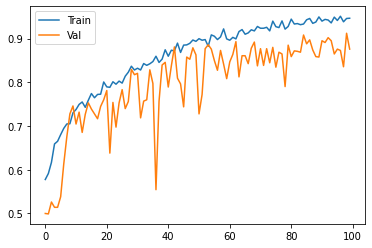

In [21]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [22]:
test_generator = test_datagen.flow_from_directory('/gdrive/My Drive/dataset-cats-dogs/cats_and_dogs/test',
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary'
                                   )

Found 1000 images belonging to 2 classes.


In [23]:
model2 = model

In [24]:
model2.load_weights('model_dogs_cats.hdf5')

In [25]:
model2.evaluate(test_generator)

32/32 [==============================] - 297s 10s/step - loss: 0.3301 - accuracy: 0.8730


[0.33007702231407166, 0.8730000257492065]

# As we can see, our artificial intelligence model obtained an accuracy of 87.3% in the final evaluation with our test images. Thank you.